In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eli5

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
test_data = pd.read_csv('GiveMeSomeCredit/cs-test.csv')
df = train_data.copy()
df_test = test_data.copy()

Metadata:

In [3]:
metadata = pd.read_excel('GiveMeSomeCredit/Data Dictionary.xls', header=1)
metadata

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


Target variabel = SeriousDlqin2yrs

In [4]:
metadata.loc[0]['Description']

'Person experienced 90 days past due delinquency or worse '

In [5]:
df.shape

(150000, 12)

In [6]:
df_test.shape

(101503, 12)

In [7]:
df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

Semua data merupakan data numerik.

In [8]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Terdapat kolom Unnamed: 0 yang harus di hapus pada df dan df_test. Kolom SeriousDlqin2yrs juga harus dihapus pada df_test, karena kolom ini merupakan apa yang ingin diprediksi:

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)

Cek jumlah antara nilai 0 dan 1 pada kolom SeriousDlqin2yrs:

In [12]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Nilai 0 dan 1 dalam kolom SeriousDlqin2yrs tidak imbang (unbalanced dataset)

Melihat distribusi tiap data:

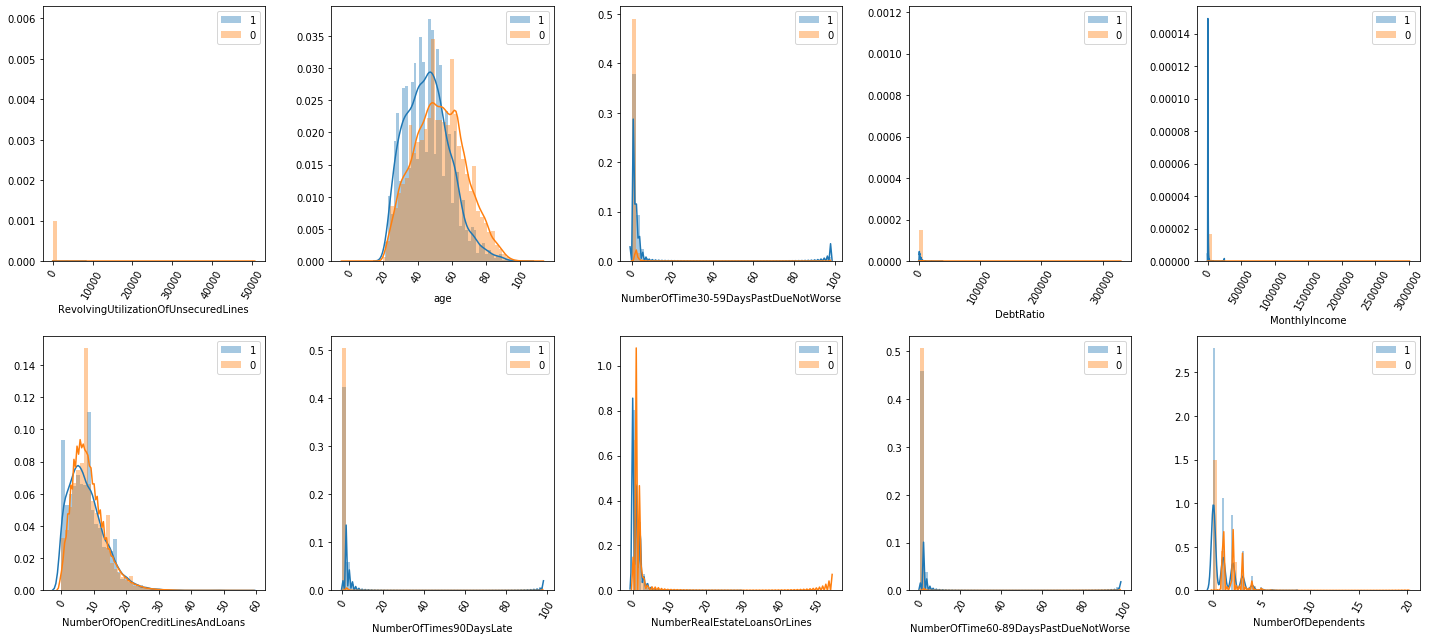

In [13]:
i = 1
plt.figure(figsize=(20, 9))
for col in df.columns[1:]:
    plt.subplot(2,5,i)
    sns.distplot(df[df['SeriousDlqin2yrs'] == 1][col].dropna(), label='1')
    sns.distplot(df[df['SeriousDlqin2yrs'] == 0][col].dropna(), label='0')
    plt.xticks(rotation=60)
    plt.legend()
    i+=1

plt.tight_layout()
plt.show()

Banyak data yang memiliki nilai outlier seperti pada kolom RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, dll

Memeriksa missing value:

In [14]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

train dan test data memiliki missing value untuk kolom MonthlyIncome dan NumberofDependents

Mengisi missing value berdasarkan median dari rentang umur:

In [16]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Terdapat orang yang umurnya 0, ini tidak masuk akal. Kita lihat data ini:

In [17]:
df[df['age']==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


Hanya terdapat 1 data. Kita akan drop data ini:

In [18]:
df.drop(df[df['age']==0].index, inplace=True)

In [19]:
df['age'].describe()

count    149999.000000
mean         52.295555
std          14.771298
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Kita akan membagi rentang umur:

1. 21 - 35
2. 36 - 45
3. 46 - 55
4. 56 - 65
5. 65 keatas

In [20]:
median_21_35 = df[(df['age'] >= 21) & (df['age'] <= 35)]['MonthlyIncome'].median()
median_36_45 = df[(df['age'] >= 36) & (df['age'] <= 45)]['MonthlyIncome'].median()
median_46_55 = df[(df['age'] >= 46) & (df['age'] <= 55)]['MonthlyIncome'].median()
median_56_65 = df[(df['age'] >= 56) & (df['age'] <= 65)]['MonthlyIncome'].median()
median_above_65 = df[df['age'] > 65]['MonthlyIncome'].median()

In [21]:
def fill_monthly_income(dataframe):
    if pd.isnull(dataframe['MonthlyIncome']):
        if (dataframe['age'] >= 21) and (dataframe['age'] <= 35):
            return median_21_35
        elif (dataframe['age'] >= 36) and (dataframe['age'] <= 45):
            return median_36_45
        elif (dataframe['age'] >= 46) and (dataframe['age'] <= 55):
            return median_46_55
        elif (dataframe['age'] >= 56) and (dataframe['age'] <= 65):
            return median_56_65
        else:
            return median_above_65
    else:
        return dataframe['MonthlyIncome']

In [22]:
df['MonthlyIncome'] = df.apply(fill_monthly_income, axis=1)
df_test['MonthlyIncome'] = df_test.apply(fill_monthly_income, axis=1)

In [23]:
median_21_35_dep = df[(df['age'] >= 21) & (df['age'] <= 35)]['NumberOfDependents'].median()
median_36_45_dep = df[(df['age'] >= 36) & (df['age'] <= 45)]['NumberOfDependents'].median()
median_46_55_dep = df[(df['age'] >= 46) & (df['age'] <= 55)]['NumberOfDependents'].median()
median_56_65_dep = df[(df['age'] >= 56) & (df['age'] <= 65)]['NumberOfDependents'].median()
median_above_65_dep = df[df['age'] > 65]['NumberOfDependents'].median()

In [24]:
def fill_num_dependents(dataframe):
    if pd.isnull(dataframe['NumberOfDependents']):
        if (dataframe['age'] >= 21) and (dataframe['age'] <= 35):
            return median_21_35_dep
        elif (dataframe['age'] >= 36) and (dataframe['age'] <= 45):
            return median_36_45_dep
        elif (dataframe['age'] >= 46) and (dataframe['age'] <= 55):
            return median_46_55_dep
        elif (dataframe['age'] >= 56) and (dataframe['age'] <= 65):
            return median_56_65_dep
        else:
            return median_above_65_dep
    else:
        return dataframe['NumberOfDependents']

In [25]:
df['NumberOfDependents']= df.apply(fill_num_dependents, axis=1)
df_test['NumberOfDependents'] = df_test.apply(fill_num_dependents, axis=1)

In [26]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [27]:
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

**Balancing Dataset**

In [29]:
len(df[df['SeriousDlqin2yrs'] == 0])

139973

In [30]:
len(df[df['SeriousDlqin2yrs'] == 1])

10026

In [33]:
df_1 = df[df['SeriousDlqin2yrs'] == 1]

In [32]:
df_0_downsample = df[df['SeriousDlqin2yrs'] == 0].sample(n=len(df[df['SeriousDlqin2yrs'] == 1]), random_state=1000)

In [35]:
df_balance = pd.concat([df_0_downsample, df_1])

## Modelling

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**With Balance Dataset**

In [40]:
# Persiapan feature dan target:
target = df_balance['SeriousDlqin2yrs']
feature = df_balance.drop('SeriousDlqin2yrs', axis=1)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=1000)

In [42]:
# inisiasi model
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(random_state=1000)
model_logreg = LogisticRegression(solver='liblinear', multi_class='ovr')
model_knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model_svc = SVC(kernel='linear', gamma = 'scale', random_state=1000, probability=True)
model_rf = RandomForestClassifier(n_estimators=100, random_state=1000, max_depth=4)
model_adaboost = AdaBoostClassifier(random_state=1000)
model_gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=1000)

In [36]:
# ls_model = [model_nb, model_dt, model_logreg, model_knn, model_svc, model_rf, model_adaboost, model_gboost]
# ls_nama_model = ['Gaussian Naive Bayes', 'Decision Tree', 'Logistic Regression', 'KNearestNeighbors', 'SVC', 'Random Forest', 'Adaboost', 'Gradient Boosting']

In [37]:
# ls_accuracy = []
# ls_confusion_matrix = []
# ls_prediction = []
# ls_class_report = []
# for model in ls_model:
#     model.fit(X_train, y_train)
#     prediction = model.predict(X_val)
#     ls_prediction.append(prediction)
#     acc_score = accuracy_score(y_val, prediction)
#     ls_accuracy.append(acc_score)

**Naive Bayes**

In [62]:
ls_acc = []
ls_model_name = []
ls_recall = []

In [63]:
model_nb.fit(X_train, y_train)
prediksi = model_nb.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Naive Bayes')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.5113438045375218
[[1988   17]
 [1943   63]]


**Decision Tree**

In [64]:
model_dt.fit(X_train, y_train)
prediksi = model_dt.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Decision Tree')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.6848666168037896
[[1370  635]
 [ 629 1377]]


**Logistic Regression**

In [65]:
model_logreg.fit(X_train, y_train)
prediksi = model_logreg.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Logistic Regression')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.712291199202194
[[1590  415]
 [ 739 1267]]


**KNN**

In [66]:
model_knn.fit(X_train, y_train)
prediksi = model_knn.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('KNN')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.5761655447519322
[[1260  745]
 [ 955 1051]]


**SVC**

In [67]:
# model_svc.fit(X_train, y_train)
# prediksi = model_svc.predict(X_val)
# acc = accuracy_score(y_val, prediksi)
# ls_acc.append(acc)
# ls_model_name.append('SVC')
# print(acc)
# print(confusion_matrix(y_val, prediksi))
# df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
# ls_recall.append(df_class_report.loc['recall', '1'])

**RF**

In [68]:
model_rf.fit(X_train, y_train)
prediksi = model_rf.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Random Forest')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.7703814510097232
[[1561  444]
 [ 477 1529]]


**AdaBoost**

In [69]:
model_adaboost.fit(X_train, y_train)
prediksi = model_adaboost.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Adaboost')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.775367738718524
[[1608  397]
 [ 504 1502]]


**Gradient Boosting**

In [70]:
model_gboost.fit(X_train, y_train)
prediksi = model_gboost.predict(X_val)
acc = accuracy_score(y_val, prediksi)
ls_acc.append(acc)
ls_model_name.append('Gradient Boosting')
print(acc)
print(confusion_matrix(y_val, prediksi))
df_class_report = pd.DataFrame(classification_report(y_val, prediksi, output_dict=True))
ls_recall.append(df_class_report.loc['recall', '1'])

0.7728745948641237
[[1566  439]
 [ 472 1534]]


Ringkasan:

In [71]:
pd.DataFrame({
    'Model' : ls_model_name,
    'Accuracy' : ls_acc,
    'Recall' : ls_recall
})

,Model,Accuracy,Recall
0,Naive Bayes,0.511344,0.031406
1,Decision Tree,0.684867,0.686441
2,Logistic Regression,0.712291,0.631605
3,KNN,0.576166,0.523928
4,Random Forest,0.770381,0.762213
5,Adaboost,0.775368,0.748754
6,Gradient Boosting,0.772875,0.764706


Memilih Model:

Recall tertinggi : **Gradient Boosting**

## Hyperparamter Tuning

In [75]:
n_estimators = [100, 200, 300, 500]
learning_rate = [0.1, 0.3, 0.5, 0.7, 1]
max_depth = [2, 3, 5, 7]
min_sample_leaf = [1, 3, 5, 7]

param = {
    'n_estimators' : n_estimators,
    'learning_rate' : learning_rate,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_sample_leaf
}

In [76]:
model_gboost = GradientBoostingClassifier()

In [78]:
model_gboost_cv = RandomizedSearchCV(estimator=model_gboost, 
                                     param_distributions=param,
                                     n_iter=5,
                                     cv=4,
                                    random_state=1000,
                                    n_jobs=-1)

model_gboost_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [79]:
model_gboost_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
prediksi = model_gboost_cv.predict(X_val)

In [82]:
print(classification_report(y_val, prediksi))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2005
           1       0.79      0.78      0.78      2006

    accuracy                           0.78      4011
   macro avg       0.78      0.78      0.78      4011
weighted avg       0.78      0.78      0.78      4011



## Submission Kaggle

In [84]:
model_gboost_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [86]:
hasil_prediksi = model_gboost_cv.predict_proba(df_test)

In [90]:
pd.DataFrame({
    'Id' : range(1, len(df_test)+1),
    'Probability' : hasil_prediksi[:,1]
}).to_csv('submission.csv', index=False)